In [6]:
import os
import pandas as pd
from utils.DataProcess import Start

In [7]:
df = Start('HL_8')

In [8]:
cols = [
 'OA_TT1',
 'OA_MT1',
 'Enthalpy',
 'OA_TT2',
 'OA_MT2',
 'OA_E2',
 'CHP_PDTA',
 'CHP_PDTB',
 'CHP_FT',
 'chiller_RT',
 'CHP_PDT_PV',
 'CHP_VFD_OUT',
 'chiller_supply_temp',
 'chiller_return_temp',
 'CWP_FT',
 'CT_TDT_PV',
 'CT_VFD_OUT',
 'condenser_supply_temp',
 'condenser_return_temp',
 'CT_IN_TTB',
 'CWP_TDT_PV',
 'CWP_VFD_OUT',
 'CT_WDT_A',
 'Wet_bulb_temp',
 'condenser_temp_diff',
 'loading',
 'Approach',
 'CT_eff',
 ]

In [9]:
pd.DataFrame(df[cols].isna().sum(axis=0)).sort_values(0,ascending=False)

,0
CT_eff,9
OA_MT1,0
Approach,0
loading,0
condenser_temp_diff,0
Wet_bulb_temp,0
CT_WDT_A,0
CWP_VFD_OUT,0
CWP_TDT_PV,0
CT_IN_TTB,0


In [10]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [11]:
target = 'CWP_Total_KW'

In [13]:
X_sc

array([[ 1.15815999, -0.49319538,  0.02361621, ...,  0.03041679,
        -0.7508493 ,  0.73420593],
       [ 1.24083981, -0.45386307,  0.07894547, ...,  0.03041657,
        -0.49886995,  0.39067916],
       [ 1.21787501, -0.49784187,  0.04996552, ...,  0.04752379,
        -0.56885683,  0.52917305],
       ...,
       [-0.43112213, -0.86184567, -0.78046587, ..., -0.92759005,
         1.26498365, -1.19977069],
       [-0.3851895 , -0.89432099, -0.78884514, ..., -0.93899493,
         1.22298894, -1.18206398],
       [-0.38978343, -0.85943489, -0.76739778, ..., -0.90478028,
         1.29298689, -1.23644309]])

In [20]:
data[cols] = data[cols].vaules=X_sc

C:\Users\sung\AppData\Local\Temp\ipykernel_17660\143864822.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data[cols] = data[cols].vaules=X_sc


In [21]:
data[cols]

,OA_TT1,OA_MT1,Enthalpy,OA_TT2,OA_MT2,OA_E2,CHP_PDTA,CHP_PDTB,CHP_FT,chiller_RT,...,condenser_return_temp,CT_IN_TTB,CWP_TDT_PV,CWP_VFD_OUT,CT_WDT_A,Wet_bulb_temp,condenser_temp_diff,loading,Approach,CT_eff
76,1.158160,-0.493195,0.023616,1.128902,-0.539537,-0.037150,-0.067331,0.474026,0.893460,0.290095,...,-0.450028,-0.445761,0.015836,0.0,-0.491294,-0.060792,-0.068673,0.030417,-0.750849,0.734206
77,1.240840,-0.453863,0.078945,1.194234,-0.505904,0.028666,0.355693,0.885995,0.950243,0.219810,...,-0.443280,-0.411983,-0.022357,0.0,-0.445710,-0.113550,-0.381047,0.030417,-0.498870,0.390679
78,1.217875,-0.497842,0.049966,1.161568,-0.538664,-0.017219,-0.490343,-0.762267,0.804226,0.161664,...,-0.362316,-0.317412,0.008195,0.0,-0.391007,-0.071346,0.020560,0.047524,-0.568857,0.529173
79,1.250028,-0.480660,0.070353,1.240899,-0.476322,0.076576,-0.067331,0.061816,0.942134,0.271129,...,-0.335327,-0.317412,0.046393,0.0,-0.377332,-0.055516,0.199059,0.050375,-0.610861,0.602881
80,1.199502,-0.463227,0.059934,1.189570,-0.463905,0.047852,-0.067331,0.061816,0.901572,0.414960,...,-0.382556,-0.371454,0.076951,0.0,-0.409241,0.007792,-0.068702,0.081738,-0.792835,0.785809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4390,-0.509210,-0.896232,-0.830795,-0.644382,-0.910756,-0.835044,1.624790,0.885995,-0.274671,-0.136054,...,-0.409546,-0.418740,-1.107126,0.0,-0.755687,-0.926023,0.154428,-0.910483,1.558958,-1.413549
4391,-0.509210,-0.911964,-0.842825,-0.588382,-0.880468,-0.821561,0.355693,0.474026,-0.169213,-0.045455,...,-0.416294,-0.405232,-0.900869,0.0,-0.696428,-0.889093,0.466802,-0.913334,1.348975,-1.204913
4392,-0.431122,-0.861846,-0.780466,-0.471718,-0.826841,-0.768324,0.355693,0.061816,-0.120542,-0.023080,...,-0.483766,-0.479534,-0.900869,0.0,-0.732893,-0.867989,0.109798,-0.927590,1.264984,-1.199771
4393,-0.385190,-0.894321,-0.788845,-0.481053,-0.885523,-0.808483,1.201642,0.885995,-0.558591,-0.256088,...,-0.463525,-0.472782,-0.908509,0.0,-0.723778,-0.825782,0.020530,-0.938995,1.222989,-1.182064


In [12]:
from pca import pca
data = df[cols+[target]].dropna()
X, y = data[cols], data[target]
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [28] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [28] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


{'loadings':        OA_TT1    OA_MT1  Enthalpy    OA_TT2    OA_MT2     OA_E2      CHP_PDTA  \
 PC1 -0.003452 -0.004009 -0.013763 -0.003432 -0.004056 -0.013863 -1.120818e-07   
 PC2  0.002296  0.000495  0.003630  0.002251  0.000483  0.003556  7.053853e-07   
 
          CHP_PDTB    CHP_FT  chiller_RT  ...  condenser_return_temp  \
 PC1 -2.230676e-07 -0.482086   -0.820987  ...              -0.002981   
 PC2  6.928644e-07 -0.051868   -0.320894  ...              -0.000165   
 
      CT_IN_TTB  CWP_TDT_PV  CWP_VFD_OUT  CT_WDT_A  Wet_bulb_temp  \
 PC1  -0.002977   -0.002624         -0.0 -0.004616      -0.003985   
 PC2  -0.000108    0.000884          0.0  0.000450       0.000876   
 
      condenser_temp_diff   loading  Approach    CT_eff  
 PC1            -0.000301 -0.006872  0.001304 -0.000097  
 PC2            -0.000831  0.000738 -0.000211 -0.000015  
 
 [2 rows x 28 columns],
 'PC':              PC1         PC2
 76   -325.251352  173.497070
 77   -326.089597  249.491699
 78   -176.324639

In [28]:
X = X.drop(4130)
X_train, X_test, y_train, y_test = train_test_split(data[cols], y, test_size=0.33, random_state=42)
model = pca()
model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [28] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [8] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [28] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


{'loadings':        OA_TT1    OA_MT1  Enthalpy    OA_TT2    OA_MT2     OA_E2  CHP_PDTA  \
 PC1 -0.194382 -0.236455 -0.239324 -0.196513 -0.236593 -0.239647  0.006548   
 PC2  0.243590  0.003403  0.084435  0.241921  0.002720  0.081778 -0.001265   
 PC3  0.083752  0.013364  0.038525  0.082904  0.013599  0.038078 -0.000106   
 PC4 -0.045548  0.024671  0.002897 -0.046253  0.023434  0.002165 -0.587752   
 PC5  0.334917 -0.107595  0.033421  0.323282 -0.106679  0.027798  0.039038   
 PC6  0.327511 -0.203833 -0.040897  0.319274 -0.202920 -0.045875 -0.032223   
 PC7 -0.006467  0.032251  0.021600 -0.002391  0.032884  0.023385  0.054022   
 PC8 -0.302815  0.057623 -0.059339 -0.304782  0.056755 -0.058214  0.052011   
 
      CHP_PDTB    CHP_FT  chiller_RT  ...  condenser_return_temp  CT_IN_TTB  \
 PC1  0.002835 -0.216146   -0.216790  ...              -0.233056  -0.233246   
 PC2 -0.002014 -0.064050   -0.213840  ...              -0.017543  -0.014054   
 PC3  0.000084 -0.246461   -0.035477  ...      

In [19]:
X, y = data[cols], data[target]

In [27]:
X = X.drop(4130)

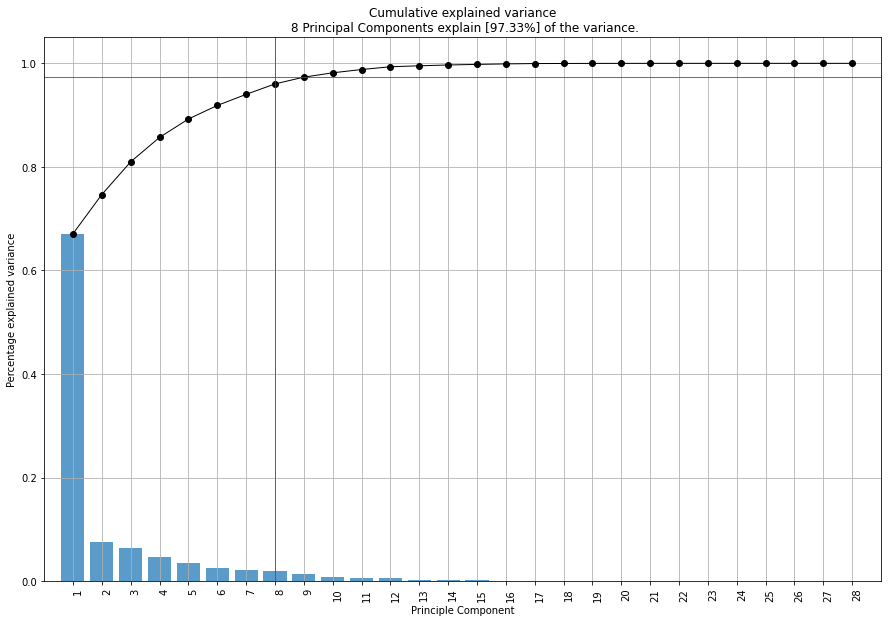

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 8 Principal Components explain [97.33%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [29]:
model.plot()

In [30]:
X.iloc[4130]

OA_TT1                  -1.790742
OA_MT1                  -1.640753
Enthalpy                -1.808246
OA_TT2                  -1.839015
OA_MT2                  -1.645451
OA_E2                   -1.804100
CHP_PDTA                -0.067331
CHP_PDTB                 0.061816
CHP_FT                  -2.034976
chiller_RT              -1.798553
CHP_PDT_PV              -0.746539
CHP_VFD_OUT              0.929146
chiller_supply_temp     -0.518250
chiller_return_temp      0.672655
CWP_FT                  -2.082523
CT_TDT_PV               -1.752760
CT_VFD_OUT              -2.537657
condenser_supply_temp   -1.752642
condenser_return_temp   -1.630789
CT_IN_TTB               -1.641415
CWP_TDT_PV              -2.023835
CWP_VFD_OUT              0.000000
CT_WDT_A                -1.726644
Wet_bulb_temp           -1.960079
condenser_temp_diff      0.109798
loading                 -2.025306
Approach                 1.782945
CT_eff                  -1.581433
Name: 4216, dtype: float64

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [4309] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [4309] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


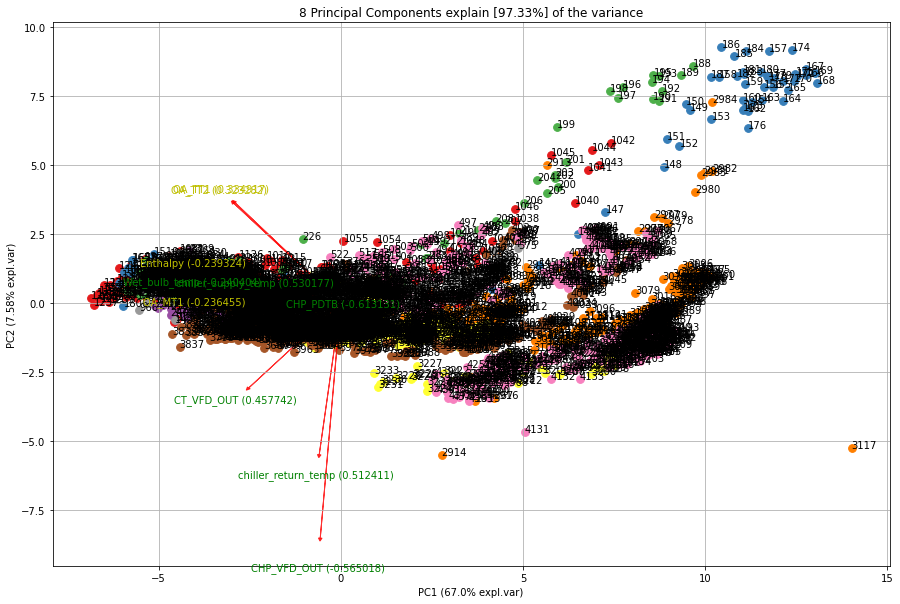

In [31]:
ax = model.biplot(n_feat=10, legend=False)

In [ ]:
np.array(cols)[[12,14,17]]

array(['chiller_supply_temp', 'CWP_FT', 'condenser_supply_temp'],
      dtype='<U21')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [4309] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [4309] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


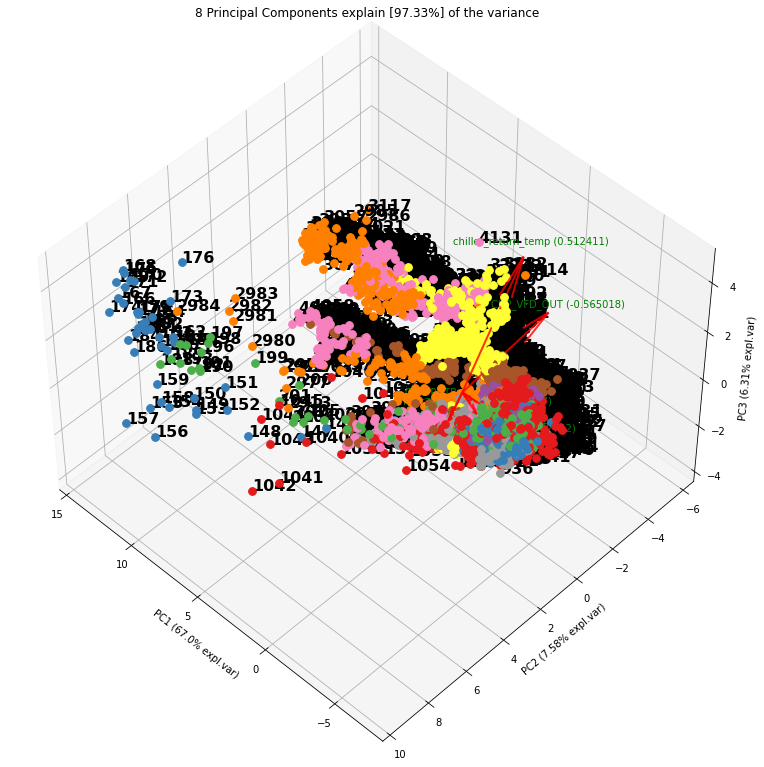

In [32]:
ax = model.biplot3d(n_feat=10, legend=False)

In [ ]:
def FS (target):
    data = df[cols+[target]].dropna()
    X, y = data[cols], data[target]
    scaler = StandardScaler()
    X_sc = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.33, random_state=42)
    # Lasso with 5 fold cross-validation
    model = LassoCV(cv=50, random_state=0, max_iter=10000)

    # Fit model
    model.fit(X_train, y_train)

    # Set best alpha
    lasso_best = Lasso(alpha=model.alpha_)
    lasso_best.fit(X_train, y_train)

    F = pd.DataFrame({
    'Feature': X.columns,
    'values':lasso_best.coef_,
    'values_abs':abs(lasso_best.coef_)})
    F = F.sort_values('values_abs',ascending=False)
    return px.bar(F,x='Feature',y='values_abs'),F

In [ ]:
fig,res = FS('CT_Total_KW')
fig

In [ ]:
fig,res = FS('chiller_kwh')
fig

In [ ]:
fig,res = FS('CWP_Total_KW')
fig

c:\Users\sung\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.222e+01, tolerance: 1.583e+01

c:\Users\sung\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.343e+03, tolerance: 1.583e+01



In [ ]:
import time
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline

start_time = time.time()
lasso_lars_ic = make_pipeline(
    StandardScaler(), LassoLarsIC(criterion="aic", normalize=False)
).fit(X, y)
fit_time = time.time() - start_time

In [ ]:
results = pd.DataFrame(
    {
        "alphas": lasso_lars_ic[-1].alphas_,
        "AIC criterion": lasso_lars_ic[-1].criterion_,
    }
).set_index("alphas")
alpha_aic = lasso_lars_ic[-1].alpha_

In [ ]:
lasso_lars_ic.set_params(lassolarsic__criterion="bic").fit(X, y)
results["BIC criterion"] = lasso_lars_ic[-1].criterion_
alpha_bic = lasso_lars_ic[-1].alpha_

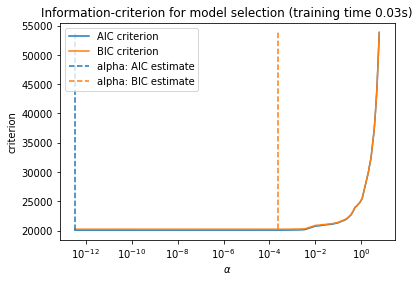

In [ ]:
ax = results.plot()
ax.vlines(
    alpha_aic,
    results["AIC criterion"].min(),
    results["AIC criterion"].max(),
    label="alpha: AIC estimate",
    linestyles="--",
    color="tab:blue",
)
ax.vlines(
    alpha_bic,
    results["BIC criterion"].min(),
    results["BIC criterion"].max(),
    label="alpha: BIC estimate",
    linestyle="--",
    color="tab:orange",
)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("criterion")
ax.set_xscale("log")
ax.legend()
_ = ax.set_title(
    f"Information-criterion for model selection (training time {fit_time:.2f}s)"
)